**YOUR NAME**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 3b: Polynomial Regression

In [2]:
import os
import random
import numpy as np
import scipy.linalg as sc
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'figure.figsize': (10,6)})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 1: Import  datasets

1. Import training ('data/lab3b-400-training.csv') and testing ('data/lab3b-100-testing.csv') datasets into separate matrices using [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html).
2. The column x is the independent variable.  Columns y1, y2, and y3 are dependent variables.  We will only be using y1.
3. Print the first 5 rows of each dataset.
4. Plot your dataset, column x and y1, with a title and axis labeled. 

--------------------------------------
Your results should look like
--------------------------------------
Training dataset [A] first 5 rows:
[ 0.86084 -0.62216  3.93574 11.60028]
[-0.30754  0.00447  4.675    8.86444]
[ 0.77201 -0.79127  3.94762 10.83111]
[-0.71808 -0.75327 11.83894  5.23568]
[-0.28735  0.01856  8.7937   8.49431]
Testing dataset [AT] first 5 rows:
[-0.91878 -0.9357  22.11518  4.98345]
[-0.92811 -1.16687 18.58222  3.34313]
[-0.96837 -1.36751 13.3575   3.65102]
[-0.96436 -1.62782 13.88831  4.08888]
[-0.97014 -1.2789  24.96344  3.74772]


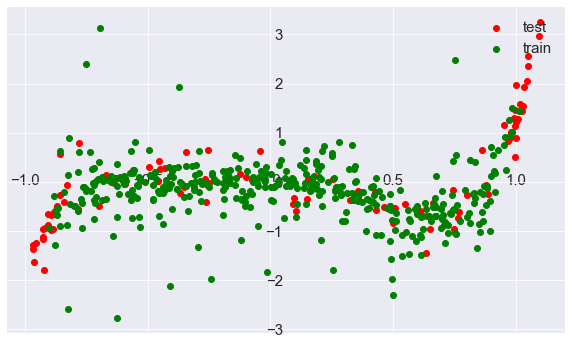


--------------------------------------
Your results should look like
--------------------------------------
Training dataset [A] first 5 rows:
[[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
Testing dataset [AT] first 5 rows:
[[-0.91878 -0.9357  22.11518  4.98345]
 [-0.92811 -1.16687 18.58222  3.34313]
 [-0.96837 -1.36751 13.3575   3.65102]
 [-0.96436 -1.62782 13.88831  4.08888]
 [-0.97014 -1.2789  24.96344  3.74772]]



In [3]:
test = np.genfromtxt('data/lab3b-100-testing.csv', delimiter=',')
test = np.array(test)
test = np.delete(test,0,0)
test = np.delete(test,0,0)

train = np.genfromtxt('data/lab3b-400-training.csv', delimiter=',')
train = np.array(train)
train = np.delete(train,0,0)
train = np.delete(train,0,0)

string = '--------------------------------------\nYour results should look like\n--------------------------------------\nTraining dataset [A] first 5 rows:\n'
string += str(train[0,:]) + '\n'
string += str(train[1,:]) + '\n'
string += str(train[2,:]) + '\n'
string += str(train[3,:]) + '\n'
string += str(train[4,:]) + '\nTesting dataset [AT] first 5 rows:\n'
string += str(test[0,:]) + '\n'
string += str(test[1,:]) + '\n'
string += str(test[2,:]) + '\n'
string += str(test[3,:]) + '\n'
string += str(test[4,:])

print(string)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.scatter(test[:,0],test[:,1], c = 'r', label='test')
plt.scatter(train[:,0],train[:,1], c = 'g', label='train')

plt.legend(loc='upper right')

plt.show()

print('''
--------------------------------------
Your results should look like
--------------------------------------
Training dataset [A] first 5 rows:
[[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
Testing dataset [AT] first 5 rows:
[[-0.91878 -0.9357  22.11518  4.98345]
 [-0.92811 -1.16687 18.58222  3.34313]
 [-0.96837 -1.36751 13.3575   3.65102]
 [-0.96436 -1.62782 13.88831  4.08888]
 [-0.97014 -1.2789  24.96344  3.74772]]
''')

## Task 2. 3 dimensional polynomial regression

### 2a. Make 3 polynomial matrices

$$
\left(\begin{array}{cccc} 
1 & x_0^1 & x_0^2 & x_0^3\\
1 & x_1^1 & x_1^2 & x_1^3\\
1 & x_2^1 & x_2^2 & x_2^3\\
1 & x_3^1 & x_3^2 & x_3^3\\
1 & x_4^1 & x_4^2 & x_4^3\\
... & ... & ... & ...\\
1 & x_n^1 & x_n^2 & x_n^3\\
\end{array}\right)
$$ 

1. Make a polynomial matrix for the training dataset using the independent variable
    2. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), `Ap`, with the same number of rows as the training dataset and 4 columns
    5. Update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    1. Print the first 5 rows of the matrix
2. Make a polynomial matrix for the test dataset
    3. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), `ATp`, with the same number of rows as the test dataset and 4 columns
    5. Like in the step above, update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    1. Print the first 5 rows of the matrix
1. Make a polynomial matrix to graph the prediction line
    1. For graphing create a [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html), `line_x`, from the range of the test dataset's x column with 100 steps
    2. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), `lineM_x`, with the same number of rows as the length of `line_x` and 4 columns
    5. Like in the step above, update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    1. Print the first 5 rows of the matrix

In [4]:
shape = np.shape(train)
Apx= train[:,0]
Apx = Apx.reshape(shape[0],1)
Ap = np.hstack((np.ones((shape[0],1)), Apx, Apx**2,Apx**3))

shape = np.shape(test)
ATx = test[:,0]
ATx = ATx.reshape(shape[0],1)
ATp = np.hstack((np.ones((shape[0],1)), ATx, ATx**2,ATx**3))

xline   = np.linspace(ATx.min(),ATx.max(),100).reshape((100,1))
lineM_x = np.hstack((np.ones((100,1)), xline, xline**2,xline**3))

string = '--------------------------------------\nYour results should look like\n--------------------------------------\nAp first 5 rows\n'
string += str(Ap[0,:]) + '\n'
string += str(Ap[1,:]) + '\n'
string += str(Ap[2,:]) + '\n'
string += str(Ap[3,:]) + '\n'
string += str(Ap[4,:]) + '\nATp first 5 rows\n'
string += str(ATp[0,:]) + '\n'
string += str(ATp[1,:]) + '\n'
string += str(ATp[2,:]) + '\n'
string += str(ATp[3,:]) + '\n'
string += str(ATp[4,:]) + '\n lineM_x first 5 rows\n'
string += str(lineM_x[0,:]) + '\n'
string += str(lineM_x[1,:]) + '\n'
string += str(lineM_x[2,:]) + '\n'
string += str(lineM_x[3,:]) + '\n'
string += str(lineM_x[4,:])

print(string)

print('''
--------------------------------------
Your results should look like
--------------------------------------
Ap first 5 rows
[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
ATp first 5 rows
[[ 1.      -0.91878  0.84417 -0.77561]
 [ 1.      -0.92811  0.86139 -0.79946]
 [ 1.      -0.96837  0.93773 -0.90807]
 [ 1.      -0.96436  0.92999 -0.89685]
 [ 1.      -0.97014  0.94118 -0.91308]]
lineM_x first 5 rows
[[ 1.      -0.97014  0.94118 -0.91308]
 [ 1.      -0.94925  0.90107 -0.85534]
 [ 1.      -0.92835  0.86183 -0.80008]
 [ 1.      -0.90745  0.82347 -0.74726]
 [ 1.      -0.88656  0.78598 -0.69682]]
''')

--------------------------------------
Your results should look like
--------------------------------------
Ap first 5 rows
[1.      0.86084 0.74104 0.63792]
[ 1.      -0.30754  0.09458 -0.02909]
[1.      0.77201 0.596   0.46012]
[ 1.      -0.71808  0.51564 -0.37027]
[ 1.      -0.28735  0.08257 -0.02373]
ATp first 5 rows
[ 1.      -0.91878  0.84417 -0.77561]
[ 1.      -0.92811  0.86139 -0.79946]
[ 1.      -0.96837  0.93773 -0.90807]
[ 1.      -0.96436  0.92999 -0.89685]
[ 1.      -0.97014  0.94118 -0.91308]
 lineM_x first 5 rows
[ 1.      -0.97014  0.94118 -0.91308]
[ 1.      -0.94925  0.90107 -0.85534]
[ 1.      -0.92835  0.86183 -0.80008]
[ 1.      -0.90745  0.82347 -0.74726]
[ 1.      -0.88656  0.78598 -0.69682]

--------------------------------------
Your results should look like
--------------------------------------
Ap first 5 rows
[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.3

### 2b. Calculate 3 dimensional polynomial regression
1.  Use [linalg.lstsq]() from scipy to calculate and print the weights, residuals and rank for the dependent variable `y1`. 
2.  Calculate and print the $R^2$ value.
    

In [6]:
shape = np.shape(train)
y = train[:,1]

shape = np.shape(train)
ATx = train[:,0]
ATx = ATx.reshape(shape[0],1)
ATp = np.hstack((np.ones((shape[0],1)), ATx, ATx**2,ATx**3))

xline   = np.linspace(ATx.min(),ATx.max(),100).reshape((100,1))
lineM_x = np.hstack((np.ones((100,1)), xline, xline**2,xline**3)) 

c, _, _, _ = sc.lstsq( ATp, y )

yPred = ATp @ c
resid = y - yPred

R2 = 1 - np.sum(resid**2) / np.sum((y - np.mean(y))**2)
print('--------------------------------------\nYour results should look like\n--------------------------------------')
print('c: ' + str(c))
print('r-squared: ' + str(R2))

print('''
--------------------------------------
Your results should look like
--------------------------------------
c: [-0.15511 -0.96979 -0.24675  1.61541]
residuals: 136.56714157926723
rank: 4
r-squared: 0.11595609001119211
''')

--------------------------------------
Your results should look like
--------------------------------------
c: [-0.15511 -0.96979 -0.24675  1.61541]
r-squared: 0.11595609001119211

--------------------------------------
Your results should look like
--------------------------------------
c: [-0.15511 -0.96979 -0.24675  1.61541]
residuals: 136.56714157926723
rank: 4
r-squared: 0.11595609001119211



### 2c. Testing and prediction

1. calculate the $R^2$ for the linear regressions ability predict the test dataset
    1.  Multiply `ATp` with the weights to get the predicted values
    2.  Calculate the $R^2$ value and print it the dependent variable `y1`.
    > $R^2 = 1 - \frac{\sum_i \left (y_i - \hat{y}_i \right )^2}{\sum_i \left (y_i - \bar{y} \right )^2}$ <br> <br> $y_i$ are the dependent variable values from the test dataset <br> $\bar{y}_i$ is the mean of the dependent variable values from the test dataset <br> $\hat{y}_i$ is the y values *predicted* by the regression

2. Print the $R^2$ for the test dataset

In [8]:
shape = np.shape(test)
ATx = test[:,0]
ATx = ATx.reshape(shape[0],1)
ATp = np.hstack((np.ones((shape[0],1)), ATx, ATx**2,ATx**3))

y = test[:,1]

yPred = ATp @ c

resid = y - yPred

R2 = 1 - np.sum(resid**2) / np.sum((y - np.mean(y))**2)

print('--------------------------------------\nYour results should look like\n--------------------------------------')
print('R2: ' + str(R2))

print('''
--------------------------------------
Your results should look like
--------------------------------------
r2 test: 0.4431027176546438
''')

--------------------------------------
Your results should look like
--------------------------------------
R2: 0.4431027176546438

--------------------------------------
Your results should look like
--------------------------------------
r2 test: 0.4431027176546438



### Task 3) Visualize the Results
In one plot:
1. Graph the training data as a scatter plot.
1. Graph the test dataset as a scatter plot.
1. Graph the prediction line
    1. the independent variable is line_x
    2. the dependent variable is lineM_x multiplied with the weights for the independent variable.
1. Include a title (with the two $R^2$ values), axis labels, and a legend

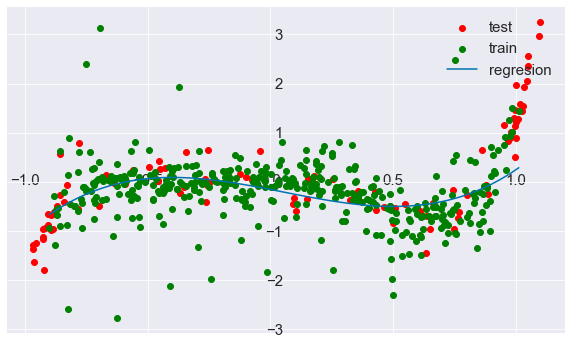

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

rline =lineM_x@c

plt.scatter(test[:,0],test[:,1], c = 'r', label='test')
plt.scatter(train[:,0],train[:,1], c = 'g', label='train')
plt.plot(xline,rline,label= "regresion")

plt.legend(loc='upper right')

plt.show()